## Activities of Daily Living (ADLs):

-----------

| Code | Activity | # trials | length of trial |
---|---|---
| D01  | Walking slowly | 1      | 100s     |
| D02  | Walking quickly | 1      | 100s     |
| D03  | Jogging slowly | 1      | 100s     |
| D04  | Jogging quickly | 1      | 100s     |
| D05  | Walking upstairs and downstairs slowly | 5      | 25s      |
| D06  | Walking upstairs and downstairs quickly | 5      | 25s      |
| D07  | Slowly sit in a half height chair, wait a moment, and up slowly | 5      | 12s      |
| D08  | Quickly sit in a half height chair, wait a moment, and up quickly | 5      | 12s|
| D09  | Slowly sit in a low height chair, wait a moment, and up slowly | 5      | 12s      |
| D10  | Quickly sit in a low height chair, wait a moment, and up quickly| 5      | 12s      |
| D11  | Sitting a moment, trying to get up, and collapse into a chair| 5      | 12s      |
| D12  | Sitting a moment, lying slowly, wait a moment, and sit again | 5      | 12s      |
| D13  | Sitting a moment, lying quickly, wait a moment, and sit again | 5      | 12s      |
| D14  | Being on oneís back change to lateral position, wait a moment, and change to oneís back  | 5      | 12s      |
| D15  | Standing, slowly bending at knees, and getting up | 5      | 12s      |
| D16  | Standing, slowly bending without bending knees, and getting up | 5      | 12s      |
| D17  | Standing, get into a car, remain seated and get out of the car | 5      | 25s      |
| D18  | Stumble while walking | 5      | 12s      |
| D19  | Gently jump without falling (trying to reach a high object)| 5      | 12s      |

## Falls:

-----------

| Code | Activity | # trials | length of trial |
---|---|---
| F01  | Fall forward while walking caused by a slip| 5      | 15s      |
| F02  | Fall backward while walking caused by a slip| 5      | 15s      |
| F03  | Lateral fall while walking caused by a slip| 5      | 15s      |
| F04  | Fall forward while walking caused by a trip| 5      | 15s      |
| F05  | Fall forward while jogging caused by a trip| 5      | 15s      |
| F06  | Vertical fall while walking caused by fainting | 5      | 15s      |
| F07  | Fall while walking, with use of hands in a table to dampen fall, caused by fainting| 5      | 15s      |
| F08  | Fall forward when trying to get up| 5      | 15s      |
| F10  | Fall forward when trying to sit down | 5      | 15s      |
| F11  | Fall backward when trying to sit down | 5      | 15s      |
| F09  | Lateral fall when trying to get up | 5      | 15s      |
| F12  | Lateral fall when trying to sit down | 5      | 15s      |
| F13  | Fall forward while sitting, caused by fainting or falling asleep| 5      | 15s      |
| F14  | Fall backward while sitting, caused by fainting or falling asleep| 5      | 15s |
| F15  | Lateral fall while sitting, caused by fainting or falling asleep| 5      | 15s      |

#### Subjects SA01-SA09:

-----------

| Subject | Age | Height | Weight | Gender |
---|---|---
| SA01    | 26  | 165    | 53     | F      |
| SA02    | 23  | 176    | 58.5   | M      |
| SA03    | 19  | 156    | 48     | F      |
| SA04    | 23  | 170    | 72     | M      |
| SA05    | 22  | 172    | 69.5   | M      |
| SA06    | 21  | 169    | 58     | M      |
| SA07    | 21  | 156    | 63     | F      |
| SA08    | 21  | 149    | 41.5   | F      |
| SA09    | 24  | 165    | 64     | M      |

In [135]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import glob
import time
warnings.filterwarnings('ignore')

path = '/Users/mattjohnson/Desktop/Python 2018/Untitled Folder/SubjectDataFrames/acm_SA0'

subjectList = []

for i in range(1,6):
    data = pd.read_csv(path + str(i) + '.csv')
    data = data.drop('Unnamed: 0', axis=1)
    df = data[ ['x1', 'y1', 'z1', 'x2', 'y2', 'z2','activity', 'subject', 'trial']]
    subjectList.append(df)

In [136]:
fall_titles = ['Fall forward while walking caused by a slip', 'Fall backward while walking caused by a slip', 
    'Lateral fall while walking caused by a slip', 'Fall forward while walking caused by a trip', 
    'Fall forward while jogging caused by a trip', 'Vertical fall while walking caused by fainting',
    'Fall while walking, with use of hands in a table to dampen fall, caused by fainting'
    'Fall forward when trying to get up', 'Lateral fall when trying to get up', 
    'Fall forward when trying to sit down', 'Fall backward when trying to sit down', 'Lateral fall when trying to sit down',
    'Fall forward while sitting, caused by fainting or falling asleep',
    'Fall backward while sitting, caused by fainting or falling asleep',
    'Lateral fall while sitting, caused by fainting or falling asleep']

adl_titles = ['Walking slowly', 'Walking quickly', 'Jogging slowly', 'Jogging quickly', 'Walking upstairs and downstairs slowly',
    'Walking upstairs and downstairs quickly','Slowly sit in a half height chair, wait a moment, and up slowly',
    'Quickly sit in a half height chair, wait a moment, and up quickly',
    'Slowly sit in a low height chair, wait a moment, and up slowly','Quickly sit in a low height chair, wait a moment, and up quickly',
    'Sitting a moment, trying to get up, and collapse into a chair',
    'Sitting a moment, lying slowly, wait a moment, and sit again','Sitting a moment, lying quickly, wait a moment, and sit again',
    'Being on oneís back change to lateral position, wait a moment, and change to oneís back',
    'Standing, slowly bending at knees, and getting up', 'Standing, slowly bending without bending knees, and getting up',
    'Standing, get into a car, remain seated and get out of the car','Stumble while walking',
    'Gently jump without falling (trying to reach a high object)']

#### Plotting / filter methods:

In [152]:
fs = 200.0 # frequency samplet

def get_trial_time(index, kind):
    
    r=5
    if kind == 'f':
        n = 3000.0
        t = np.linspace(0, 15.0,n, endpoint=False)
    else:
        if index in list(range(0,4)):
            T = 100 # seconds
        elif index in [4, 5, 16]:
            T = 25 
        else: T = 12
        
        n = int(T * fs) # total number of samples
        t = np.linspace(0, T, n, endpoint=False)
                
        if index <= 3: 
            r = 1 
                    
    return t, int(n), int(r)
    
## index w <-- activity = F[w+1], eg. index=4 gives a df that contains activity F05 
## This makes sense since data_list[0] contains activity F01

def plot_trials(index, kind):
    
    if kind == 'f': 
        correctList, correctTitles, correctCodes = fall_df_list, fall_titles, falls
    else: 
        correctList, correctTitles, correctCodes = adl_df_list, adl_titles, dailies
                
    new_df = correctList[index]
    
    t, n, r = get_trial_time(index, kind)
    
    T = int(n/fs)
    l = list( range(0, int(1000*T), int(1000*0.625)))
    l = np.array(l)/1000
    xcoords = list(l)
    st = new_df['subject'].values[0]
    
    plt.figure(figsize=( 15, 2*r))

    for i in range(0,r):
        curr_df = new_df[i*n:i*n+n]
        if len(curr_df) != n:
            curr_df = curr_df.append(curr_df.iloc[len(curr_df)-1])
        plt.subplot(r, 1, i+1)
        plt.plot(t, curr_df['fx'], 'b-', label='x')
        plt.plot(t, curr_df['fy'], 'r-', label='y')
        plt.plot(t, curr_df['fz'], 'y-', label='z')
        for xc in xcoords:
            plt.axvline(x=xc)
        plt.grid()
        labs = list(range(0,len(xcoords)))
        plt.xticks(xcoords, labs)
        plt.legend()
        plt.ylabel('trial'+ str(i+1))
        if i == 0: 
            plt.title( st + '-' + correctCodes[index] + ':' + correctTitles[index] )

    plt.subplots_adjust(hspace=0.35)
    plt.show()
    
def plot_one_from_each(index, kind):
    
    if kind == 'f': 
        correctList, correctTitles, correctCodes = fall_df_list, fall_titles, falls
    else: 
        correctList, correctTitles, correctCodes = adl_df_list, adl_titles, dailies
            
    plt.figure(figsize=(15,10))
        
    for i in range(0,5):
        if (index+i+1)==len(correctList): return
        new_df = correctList[index+i]
        t, n, r = get_trial_time(index, kind)

        try:
            curr_df = new_df[0:n]
            if len(curr_df) != n:
                curr_df = curr_df.append(curr_df.iloc[len(curr_df)-1])
            plt.subplot(5, 1, i+1)
            plt.plot(t, curr_df['bx'], 'b-', label='x')
            plt.plot(t, curr_df['by'], 'r-', label='y')
            plt.plot(t, curr_df['bz'], 'y-', label='z')
            plt.grid()
            plt.legend()
            plt.ylabel('Acc')
            plt.title( correctCodes[index + i] + ' ' + correctTitles[index + i])
        except:
            print('')
            
    plt.subplots_adjust(hspace=0.4)
    plt.show()    
    
def plot_feats(index, kind):

    if kind == 'f': 
        correctList, correctTitles, correctCodes = fall_df_list, fall_titles, falls
    else: 
        correctList, correctTitles, correctCodes = adl_df_list, adl_titles, dailies
        
    t, n, r = get_trial_time(index, kind)
    
    curr_df = correctList[index][0:int(n)]
    feat_list = ['vector_mag', 'vector_mag2', 'horiz_mag', 'vert', 'std_mag', 'horiz_std_mag',
                 'peak_diff', 'HorizSigMagArea', 'angle_from_horiz']
    colour_list = ['b-', 'r-', 'k-', 'c-', 'C2', 'C4', 'C1', 'C5', 'C6']

    x = len(feat_list)
    plt.figure(figsize=(15,2*x))
    
    for i, feat, colour in zip(range(0,x), feat_list, colour_list):
        plt.subplot(x, 1, i+1)
        plt.plot(t, curr_df[feat], colour, label=feat)
        plt.grid()
        plt.legend()
        plt.ylabel(feat)
        if i==0: plt.title( correctCodes[index] + ' ' + correctTitles[index])

    plt.subplots_adjust(hspace=0.35)
    plt.show()
    
    
def plot_trial(index, kind):
    
    if kind == 'f': 
        correctList, correctTitles, correctCodes = fall_df_list, fall_titles, falls
    else: 
        correctList, correctTitles, correctCodes = adl_df_list, adl_titles, dailies
                
    new_df = correctList[index]
    
    t, n, r = get_trial_time(index, kind)
    plt.figure(figsize=( 15, 24))

    xtypes = ['ax', 'fx', 'bx', 'gx']
    ytypes = ['ay', 'fy', 'by', 'gy']
    ztypes = ['az', 'fz', 'bz', 'gz']
    ylabs = ['raw acc (m/s^2)', 'filtered', 'filt differential', 'gyro']
    for i in range(0,len(xtypes)):
        curr_df = new_df[0:n]
        if len(curr_df) != n:
            curr_df = curr_df.append(curr_df.iloc[len(curr_df)-1])
        plt.subplot(12, 1, i+1)
        plt.plot(t, curr_df[xtypes[i]], 'b-', label='x')
        plt.plot(t, curr_df[ytypes[i]], 'r-', label='y')
        plt.plot(t, curr_df[ztypes[i]], 'y-', label='z')
        plt.grid()
        plt.legend()
        plt.ylabel(ylabs[i])
        if i == 0: plt.title( correctCodes[index] + ' ' + correctTitles[index])

    curr_df = correctList[index][0:int(n)]
    if len(curr_df) != n:
            curr_df = curr_df.append(curr_df.iloc[len(curr_df)-1])
            
    feat_list = ['vector_mag', 'vector_mag2', 'horiz_mag', 'vert', 'std_mag', 'horiz_std_mag', 
                 'peak_diff', 'HorizSigMagArea', 'angle_from_horiz', 'gyro_horiz_std_mag']
    colour_list = ['b-', 'r-', 'k-', 'c-', 'C2', 'C4', 'C1', 'C5', 'C6', 'C7']

    x = len(feat_list) + len(xtypes)
    plt.figure(figsize=(15,2*x))
    
    for i, feat, colour in zip(range(0,x), feat_list, colour_list):
        plt.subplot(12, 1, i+1)
        plt.plot(t, curr_df[feat], colour, label=feat)
        plt.grid()
        plt.legend()
        plt.ylabel(feat)
        if i==0: plt.title( correctCodes[index] + ' ' + correctTitles[index])

    plt.subplots_adjust(hspace=0.35)
    plt.show()
    
from scipy.signal import butter, lfilter, freqz
# Filter requirements.
order = 4
fs = 200.0       # sample rate, Hz
cutoff = 5.0  # desired cutoff frequency of the filter, Hz

# From??????
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [138]:
dailies = ['D01','D02','D03','D04','D05','D06','D07','D08','D09','Da10','D11','D12','D13','D14','D15',
 'D16','D17','D18','D19']
falls = ['F01','F02','F03','F04','F05','F06','F07','F08','F09','F10','F11','F12','F13','F14','F15']

adl_list = []
fall_list = []

for s in subjectList:
    for d in dailies:
        tempdf = s[ s['activity']==d]
        adl_list.append(tempdf)
    
    for f in falls:
        tempdf = s[ s['activity']==f]
        fall_list.append(tempdf)

In [244]:
df_ = fall_df_list[1].copy()
df_['activity'][0]

0    F02
0    F02
Name: activity, dtype: object

In [45]:
#sliding_window(tdf, 'a')

In [48]:
def mark_falls(dataframe):
    subj = 

256

#### Data preparation method:

In [ ]:
trials = ['R01', 'R02', 'R03', 'R04', 'R05']
fall_df_list = []
adl_df_list = []
#sliding_window = []

windowList_adl = []
windowList_fall = []
numWins_adl = []
numWins_fall = []

def sliding_window(dataframe, kind):           
            
    z=0
    for i in range(0, len(dataframe)-256, 128):
        w=256
        w1 = dataframe.iloc[i:i+w][:]
        w1['Fall'] = 0
        
        if kind=='f':
            windowList_fall.append(w1)
        else: 
            windowList_adl.append(w1)
        z+=1
    
    if kind=='f':
        numWins_fall.append(z)
    else: 
        numWins_adl.append(z)
            
            
def prepare_data(kind):
        
    if kind == 'f': 
            putList, takeList = fall_df_list, fall_list
    else: 
            putList, takeList = adl_df_list, adl_list
        
    start = time.time()
    
    for i in range(0,len(takeList)):        
        
        my_df = takeList[i].copy()
        
        new_df = pd.DataFrame()

    
        for trial in trials:
    
            # Get relevant trial data
            trial_df = my_df[ my_df['trial']==trial ]
    
            tempdf = pd.DataFrame()
            # Low Pass Buttersworth Filter and remove bias
            tempdf['ax'], tempdf['ay'], tempdf['az'] = trial_df['x1'], trial_df['y1'], trial_df['z1']
            #temp_bx = pd.Series(butter_lowpass_filter( tempdf['ax'], cutoff, fs, order)).diff()
            tempdf = tempdf.reset_index(drop=True)
            tempdf['fx'] = pd.Series(butter_lowpass_filter( trial_df['x1'], cutoff, fs, order))
            tempdf['fy'] = pd.Series(butter_lowpass_filter( trial_df['y1'], cutoff, fs, order))
            tempdf['fz'] = pd.Series(butter_lowpass_filter( trial_df['z1'], cutoff, fs, order))
            tempdf['bx'] = tempdf['fx'].diff()
            tempdf['by'] = tempdf['fy'].diff()
            tempdf['bz'] = tempdf['fz'].diff()

            tempdf = tempdf.reset_index(drop=True)
            trial_df = trial_df.reset_index(drop=True)
            tempdf['gx'], tempdf['gy'], tempdf['gz'] = trial_df['x2'], trial_df['y2'], trial_df['z2']

            tempdf['y_roll'] = pd.Series(tempdf['by'].rolling(200).mean())
            tempdf['fy_roll'] = pd.Series(tempdf['fy'].rolling(200).mean())
            
            tempdf['y_roll400'] = pd.Series(tempdf['by'].rolling(400).mean())
            tempdf['fy_roll400'] = pd.Series(tempdf['fy'].rolling(400).mean())
            
            tempdf['gy_roll'] = pd.Series(tempdf['by'].rolling(200).mean())            
            
            tempdf['bx_std'] = pd.rolling_std(tempdf['bx'], 200)
            tempdf['by_std'] = pd.rolling_std(tempdf['by'], 200)
            tempdf['bz_std'] = pd.rolling_std(tempdf['bz'], 200)
            tempdf['fx_std'] = pd.rolling_std(tempdf['fx'], 200)
            tempdf['fy_std'] = pd.rolling_std(tempdf['fy'], 200)
            tempdf['fz_std'] = pd.rolling_std(tempdf['fz'], 200)
            tempdf['gx_std'] = pd.rolling_std(tempdf['fx'], 200)
            tempdf['gy_std'] = pd.rolling_std(tempdf['fy'], 200)
            tempdf['gz_std'] = pd.rolling_std(tempdf['fz'], 200)
        
            tempdf['bx_std400'] = pd.rolling_std(tempdf['bx'], 400)
            tempdf['by_std400'] = pd.rolling_std(tempdf['by'], 400)
            tempdf['bz_std400'] = pd.rolling_std(tempdf['bz'], 400)
            tempdf['fx_std400'] = pd.rolling_std(tempdf['fx'], 400)
            tempdf['fy_std400'] = pd.rolling_std(tempdf['fy'], 400)
            tempdf['fz_std400'] = pd.rolling_std(tempdf['fz'], 400)
            
            tempdf['xsum'] = pd.expanding_sum(((abs(tempdf['ax']).rolling(2).sum()/2)*(1/200)).fillna(0))
            tempdf['ysum'] = pd.expanding_sum(((abs(tempdf['ay']).rolling(2).sum()/2)*(1/200)).fillna(0))
            tempdf['zsum'] = pd.expanding_sum(((abs(tempdf['az']).rolling(2).sum()/2)*(1/200)).fillna(0))
            tempdf['time'] = 1/200
            tempdf['time'] = pd.expanding_sum(tempdf['time'])
            # C10 Signal Magnitude Area
            tempdf['SigMagArea'] = (tempdf['xsum'] + tempdf['ysum'] + tempdf['zsum']) / tempdf['time']
            # C11
            tempdf['HorizSigMagArea'] = (tempdf['xsum'] + tempdf['zsum']) / tempdf['time']
            
            tempdf['vm'] = np.sqrt( tempdf['fx']**2 + tempdf['fy']**2 + tempdf['fz']**2 )
            # Maximum peak to peak acceleration amplitude
            tempdf['Amax'] = (tempdf['vm'].rolling(200).max())
            tempdf['Amin'] = (tempdf['vm'].rolling(200).min())
            # C3
            tempdf['peak_diff'] = tempdf['Amax']-tempdf['Amin']
            
            tempdf['angle_from_horiz'] = np.arctan2( np.sqrt(tempdf['fx']**2 + tempdf['fz']**2), -tempdf['fy']) * 180 / np.pi
            tempdf['angle_std'] = pd.rolling_std(tempdf['angle_from_horiz'], 200)
            
            
            tempdf['horiz_std_mag9'] = np.sqrt(tempdf['fx_std']**2 + tempdf['fz_std']**2 )
            tempdf['horiz_vector_mag9'] = np.sqrt( tempdf['fx']**2 + tempdf['fz']**2 )
            tempdf['std_mag9'] = np.sqrt( tempdf['fx_std']**2 + tempdf['fy_std']**2 + tempdf['fz_std']**2 )
            tempdf['diff_std_mag9'] = np.sqrt( tempdf['bx_std']**2 + tempdf['by_std']**2 + tempdf['bz_std']**2 )
        
        
            tempdf = pd.concat([tempdf.reset_index(drop=True), trial_df[['activity', 'subject', 'trial']].reset_index(drop=True)], axis=1)
            new_df = pd.concat([new_df.reset_index(drop=True), tempdf])
        
            if kind == 'f':
                sliding_window(tempdf, kind)
                
        #differential vector mag
        new_df['vector_mag2'] = np.sqrt( new_df['bx']**2 + new_df['by']**2 + new_df['bz']**2 )
        new_df['vector_mag'] = np.sqrt( new_df['fx']**2 + new_df['fy']**2 + new_df['fz']**2 )
        new_df['gyro_vector_mag'] = np.sqrt( new_df['gx']**2 + new_df['gy']**2 + new_df['gz']**2 )

        new_df['horiz_mag2'] = np.sqrt( new_df['bx']**2 + new_df['bz']**2 )
        new_df['gyro_horiz_mag'] = np.sqrt( new_df['gx']**2 + new_df['gz']**2 )

        # C2
        new_df['horiz_mag'] = np.sqrt( new_df['fx']**2 + new_df['fz']**2 )

        new_df['vert'] = new_df['by'] - new_df['y_roll']
        new_df['vert2'] = new_df['ay'] - new_df['y_roll']
        new_df['vert3'] = new_df['fy'] - new_df['fy_roll']
        new_df['vert4'] = new_df['fy'] - new_df['fy_roll400']

        # C9
        new_df['std_mag'] = np.sqrt( new_df['fx_std']**2 + new_df['fy_std']**2 + new_df['fz_std']**2 )
        new_df['std_mag2'] = np.sqrt( new_df['bx_std']**2 + new_df['by_std']**2 + new_df['bz_std']**2 )
        new_df['gyro_std_mag'] = np.sqrt( new_df['gx_std']**2 + new_df['gy_std']**2 + new_df['gz_std']**2 )
        # C8
        new_df['horiz_std_mag'] = np.sqrt( new_df['fx_std']**2 + new_df['fz_std']**2 )
        new_df['horiz_std_mag2'] = np.sqrt( new_df['bx_std']**2 + new_df['bz_std']**2 )
        new_df['gyro_horiz_std_mag'] = np.sqrt( new_df['gx_std']**2 + new_df['gz_std']**2 )

        new_df['horiz_std_mag_400'] = np.sqrt( new_df['fx_std400']**2 + new_df['fz_std400']**2 )
        new_df['horiz_std_mag2_400'] = np.sqrt( new_df['bx_std400']**2 + new_df['bz_std400']**2 )
        
        #new_df['angle_from_horiz'] = np.arctan2( np.sqrt(new_df['fx']**2 + new_df['fz']**2), -new_df['fy']) * 180 / np.pi
        
        #print(new_df.isnull().sum())
        putList.append(new_df.fillna(0))

    print ('Completed... It took', time.time()-start, 'seconds.')

## Start

In [ ]:
prepare_data('f') # wList now
prepare_data('a')

In [ ]:
#f

In [335]:
# putting together falls and adls
fall_df = pd.concat(fall_df_list)
adl_df = pd.concat(adl_df_list)
all_df = pd.concat([fall_df, adl_df]).fillna(0)

# List Comprehension for fall column 
all_df['Fall'] = [1 if x in falls else 0 for x in all_df['activity']]

# save own copies of lists just in case
wList_f = windowList_fall[:]
falls = fall_df_list[:]
adls = adl_df_list[:]

In [316]:
print(len(adl_df_list))
print(len(fall_df_list))

print(len(windowList_fall))
print(len(windowList_adl))

0
75
8250
0


In [332]:
len(wList)

8250

In [318]:
#
    
fall_inds =  [[11], [11,12], [13], [11], [11,12]]

wList = windowList_fall[:]

for i in range(len(wList)):
    
    curr_indices = fall_inds[i]
    
    for _ in curr_indices:
        
        currentWindow = pd.concat(wList[ 22*i : 22*(i+1) ]).reset_index(drop=True)

      # ['Fall'][11]=1 
        
        
        #currentWindow = pd.concat(wList[ 22*i : 22*(i+1) ]).reset_index(drop=True)
    #currentWindow = currentWindow.iloc[fall_inds[i]]['']
    #print(currentWindow)
    
    if i == 2:
        break

In [320]:
wList = windowList_fall[:]


In [305]:
wdf = wdf.reset_index(drop=True)
wdf['Fall'][[11, 12]]=1

In [329]:
# each person has 15(unique falls) * 5(trials/fall) = 75 trials
# 75 (trials/person) * 5 (people) = 375 (trials)
# 375 (trials) * 22 (windows/trial) = 8250 (windows) = len(windowList_fall)
# 0:22, 22:44, ..., 8228:8250
# 22*index : 22*(index+1)
# windowList_fall[22*5] = F02-R01 

belowThresh = 0
aboveThresh = 0

for window in windowList_fall:
    #print(_['horiz_std_mag9'].max())
    if window['horiz_std_mag9'].max() >= 250:
        aboveThresh+=1
    else:
        belowThresh+=1
    
print('below:', belowThresh)
print('above:', aboveThresh)


below: 7243
above: 1007


In [277]:
# 375/5 = 75
# 22*5=110'
pd.Series(numWins_fall).sum()-22




8228

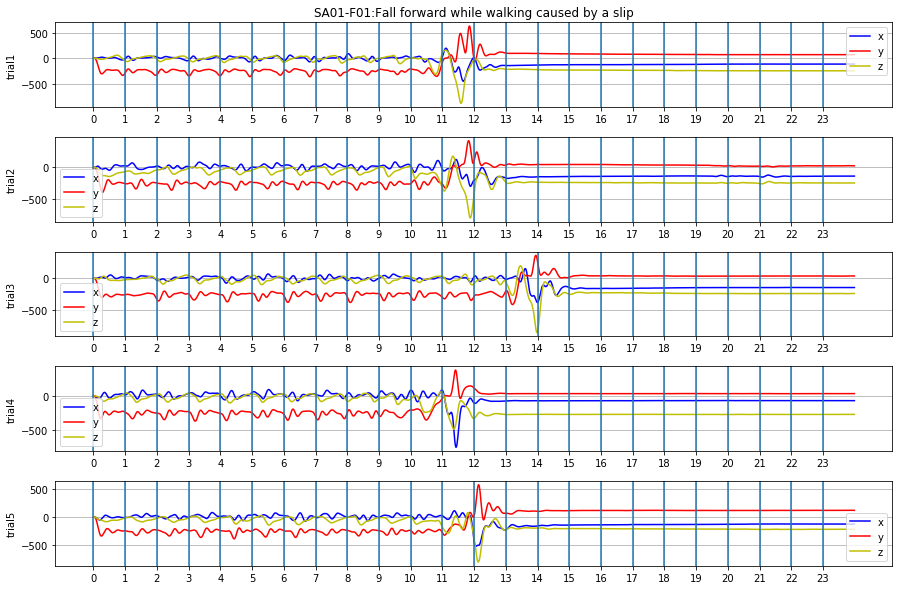

In [160]:
plot_trials(0, 'f')

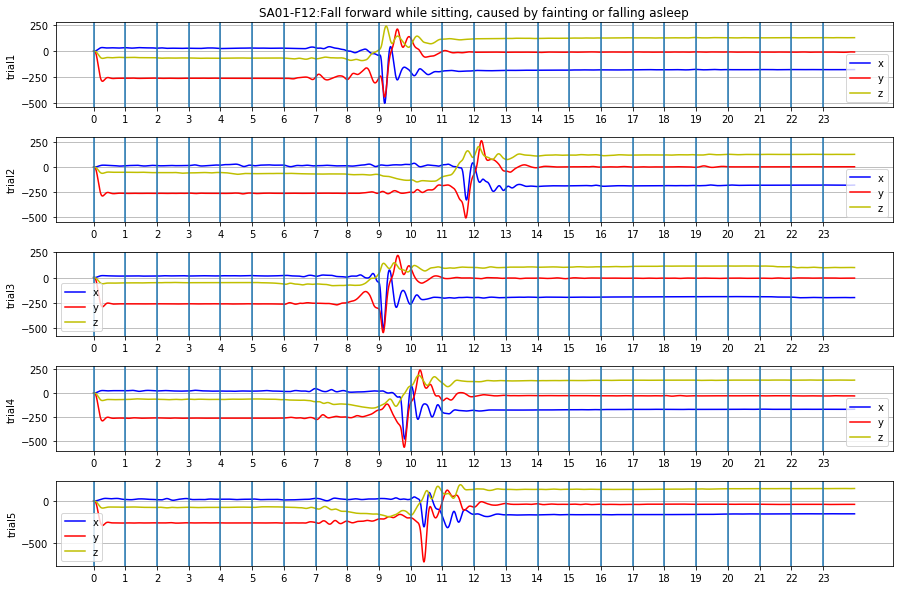

In [223]:
plot_trials(11, 'f')

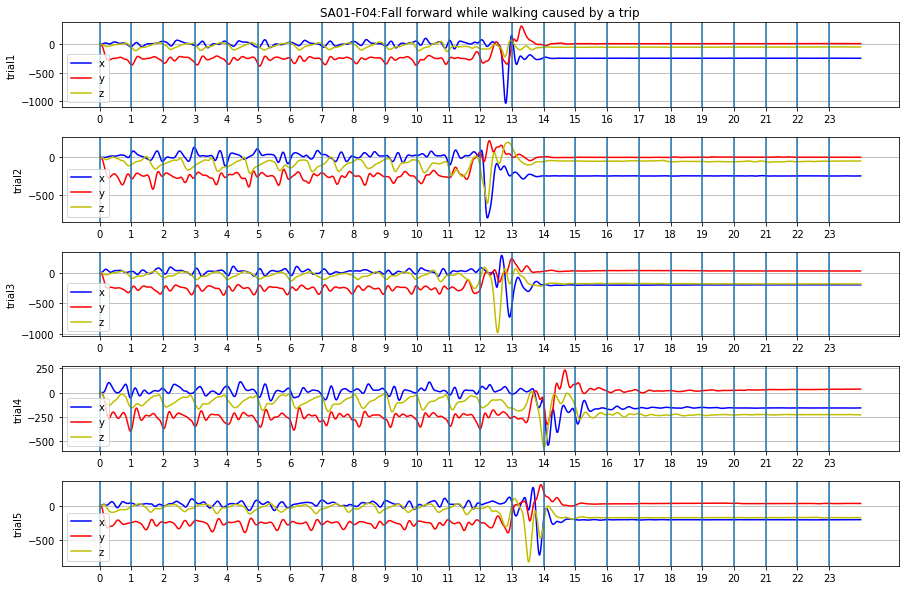

In [157]:
plot_trials(3, 'f')

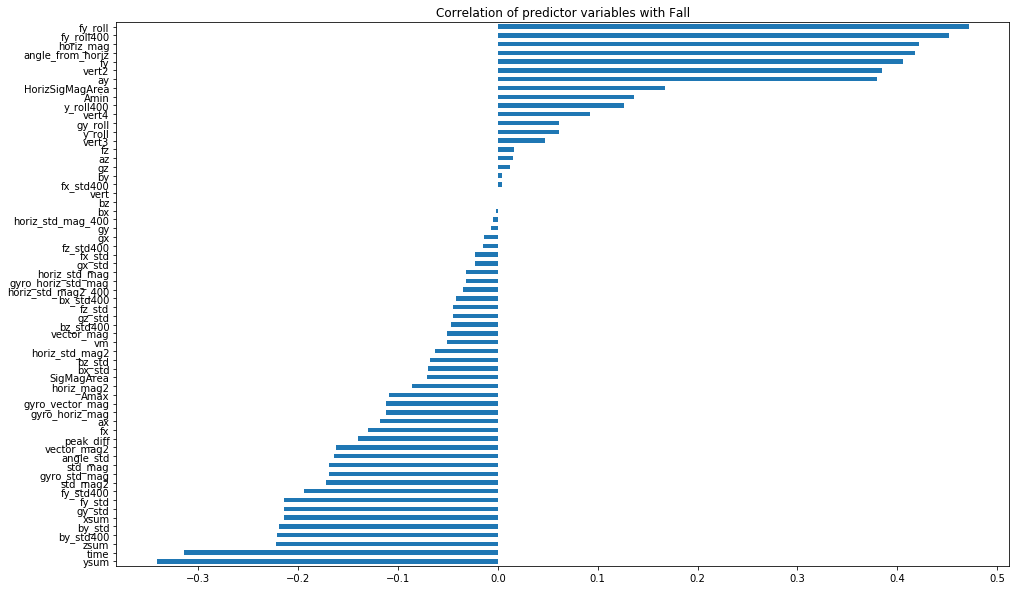

In [217]:
corr2 = all_df.corr()['Fall']

corr_rank2 = corr2.sort_values(ascending=False)

plt.subplots(figsize=(16,10))

crH2 = corr_rank2.sort_values(ascending=True)
crH2[:-1].plot(kind='barh')
plt.title('Correlation of predictor variables with Fall');

In [53]:
print('ADL Horizontal Standard Deviation Magnitude max:', 
      adl_df.groupby('activity')['horiz_std_mag'].max().max().round(3))
print('Fall Horizontal Standard Deviation Magnitude min max:', 
      fall_df.groupby('activity')['horiz_std_mag'].max().min().round(3))
# potential threshold 
print('ADL Horizontal Vector Magnitude max:', 
      adl_df.groupby('activity')['horiz_mag'].max().max().round(3))
print('Fall Horizontal Vector Magnitude min max:', 
      fall_df.groupby('activity')['horiz_mag'].max().min().round(3))
# potential threshold 

ADL Horizontal Standard Deviation Magnitude max: 264.267
Fall Horizontal Standard Deviation Magnitude min max: 236.566
ADL Horizontal Vector Magnitude max: 678.391
Fall Horizontal Vector Magnitude min max: 665.544


In [342]:
cols2 = ['ax', 'ay', 'az', 'fx', 'fy', 'fz', 'bx', 'by', 'bz', 'gx', 'gy', 'gz',
       'y_roll', 'fy_roll', 'y_roll400', 'fy_roll400', 'gy_roll', 'bx_std',
       'by_std', 'bz_std', 'fx_std', 'fy_std', 'fz_std', 'gx_std', 'gy_std',
       'gz_std', 'bx_std400', 'by_std400', 'bz_std400', 'fx_std400',
       'fy_std400', 'fz_std400', 'xsum', 'ysum', 'zsum', 'time', 'SigMagArea',
       'HorizSigMagArea', 'vm', 'Amax', 'Amin', 'peak_diff',
       'angle_from_horiz', 'angle_std',
       'vector_mag2', 'vector_mag', 'gyro_vector_mag', 'horiz_mag2',
       'gyro_horiz_mag', 'horiz_mag', 'vert', 'vert2', 'vert3', 'vert4',
       'std_mag', 'std_mag2', 'gyro_std_mag', 'horiz_std_mag',
       'horiz_std_mag2', 'gyro_horiz_std_mag', 'horiz_std_mag_400',
       'horiz_std_mag2_400']
cols = ['ax', 'ay', 'az', 'fx', 'fy', 'fz', 'bx', 'by', 'bz', 'gx', 'gy', 'gz',
       'y_roll', 'fy_roll', 'y_roll400', 'fy_roll400', 'gy_roll', 'bx_std',
       'by_std', 'bz_std', 'fx_std', 'fy_std', 'fz_std', 'gx_std', 'gy_std',
       'gz_std', 'bx_std400', 'by_std400', 'bz_std400', 'fx_std400',
       'fy_std400', 'fz_std400', 'xsum', 'ysum', 'zsum', 'time', 'SigMagArea',
       'HorizSigMagArea', 'vm', 'Amax', 'Amin', 'peak_diff',
       'angle_from_horiz', 'angle_std', 
       'horiz_std_mag9', 'horiz_vector_mag9', 'std_mag9', 'diff_std_mag9',
       'Fall']

In [225]:
adl_df.groupby('activity')['vm'].max().sort_values()[:-1].max()


983.5680111626802

KeyError: 'horiz_std_mag9'

(1)
 horiz_mag2   1.117
(2)
 horiz_mag2   0.847
(1)
 horiz_mag   1.019
(2)
 horiz_mag   0.645
 (1)
 horiz_std_mag   1.117
(2)
 horiz_std_mag   0.724
 (1)
 gyro_horiz_std_mag   1.117
(2)
 gyro_horiz_std_mag   0.724
(1)
 horiz_std_mag_400   1.059
(2)
 horiz_std_mag_400   1.0

In [343]:
for col in cols:
    a = adl_df.groupby('activity')[col].max().max().round(3)
    a2 = adl_df.groupby('activity')[col].max().sort_values()[:-1].max()
    b = fall_df.groupby('activity')[col].max().min().round(3)
    #b2 = fall_df.groupby('activity')[col].max().sort_values()[:-1].max()
    c = a/b
    c2 = a2/b
    
    print(col, ':', 'a:', a, 'b:', b)
    if c < 1.25:
        print('(1)\n', col, ' ' , c.round(3))  
    if c2 < 1.1:
        print('(2)\n', col, ' ' , c2.round(3))  
    


ax : a: 1354 b: 691
ay : a: 947 b: 395
az : a: 1691 b: 305
fx : a: 425.159 b: 182.539
fy : a: 326.62 b: 270.099
(1)
 fy   1.209
fz : a: 346.36 b: 169.932
bx : a: 32.55 b: 38.658
(1)
 bx   0.842
(2)
 bx   0.822
by : a: 88.465 b: 24.937
bz : a: 37.004 b: 22.203
gx : a: 10323 b: 3426
gy : a: 6075 b: 2435
gz : a: 5560 b: 2375
y_roll : a: 5.927 b: 3.147
fy_roll : a: 124.259 b: 84.554
(2)
 fy_roll   0.584
y_roll400 : a: 2.609 b: 1.579
fy_roll400 : a: 116.551 b: 66.097
(2)
 fy_roll400   0.655
gy_roll : a: 5.927 b: 3.147
bx_std : a: 20.547 b: 13.745
(2)
 bx_std   1.099
by_std : a: 60.658 b: 8.169
bz_std : a: 24.107 b: 6.923
fx_std : a: 155.83 b: 152.928
(1)
 fx_std   1.019
(2)
 fx_std   0.974
fy_std : a: 420.765 b: 185.976
fz_std : a: 259.033 b: 154.497
(2)
 fz_std   0.933
gx_std : a: 155.83 b: 152.928
(1)
 gx_std   1.019
(2)
 gx_std   0.974
gy_std : a: 420.765 b: 185.976
gz_std : a: 259.033 b: 154.497
(2)
 gz_std   0.933
bx_std400 : a: 18.881 b: 9.724
by_std400 : a: 54.22 b: 5.851
bz_std400 :

KeyError: 'Column not found: horiz_std_mag9'

In [232]:
#pd.pivot_table(all_df, index= 'activity', columns ='subject', values= "horiz_mag", aggfunc= [min, max])

pivot1 = pd.pivot_table(all_df, index= 'activity', values= ["horiz_mag", 'horiz_std_mag', 'vector_mag', 'vector_mag2', 'angle_from_horiz'], aggfunc= [min, max])

pivot1.head()
#sns.barplot(all_df.groupby('horiz_mag').max())

min                                               \
         angle_from_horiz angle_std horiz_mag horiz_std_mag vector_mag   
activity                                                                 
D01              0.044440       0.0  0.000190           0.0   0.006412   
D02              0.047272       0.0  0.000252           0.0   0.007489   
D03              0.013379       0.0  0.000781           0.0   0.003424   
D04              0.028796       0.0  0.000895           0.0   0.007396   
D05              0.024092       0.0  0.000295           0.0   0.007695   

                                  max                                       \
         vector_mag2 angle_from_horiz  angle_std   horiz_mag horiz_std_mag   
activity                                                                     
D01              0.0        40.175150   9.379132  192.883973     62.999091   
D02              0.0        61.324095  13.845077  302.243533     95.897713   
D03              0.0       178.727326  58.632862  288.640439     99.211741   
D04              0.0       175.003258  62.997636  389.831193    166.034009   
D05              0.0        39.305969  10.222381  194.040093     76.531952   

                                  
          vector_mag vector_mag2  
activity                          
D01       393.033538   18.420106  
D02       507.558780   23.134223  
D03       724.447525   46.482034  
D04       983.568011   82.757983  
D05       489.334311   18.262060

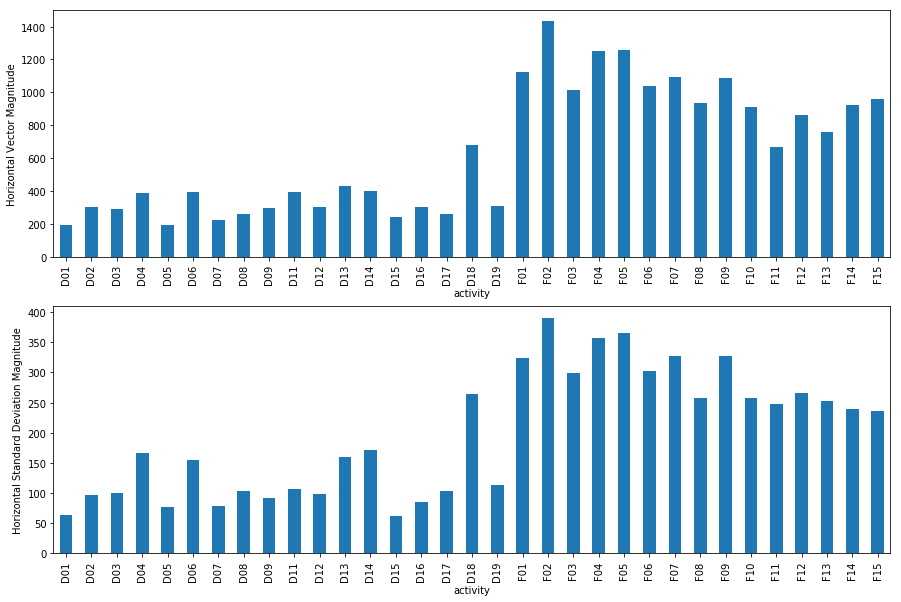

In [116]:
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
x = pivot1.loc[:, ('max', 'horiz_mag')]
x.plot(kind='bar')
plt.ylabel('Horizontal Vector Magnitude')

plt.subplot(2, 1, 2)
x = pivot1.loc[:, ('max', 'horiz_std_mag')]
x.plot(kind='bar');
plt.ylabel('Horizontal Standard Deviation Magnitude');

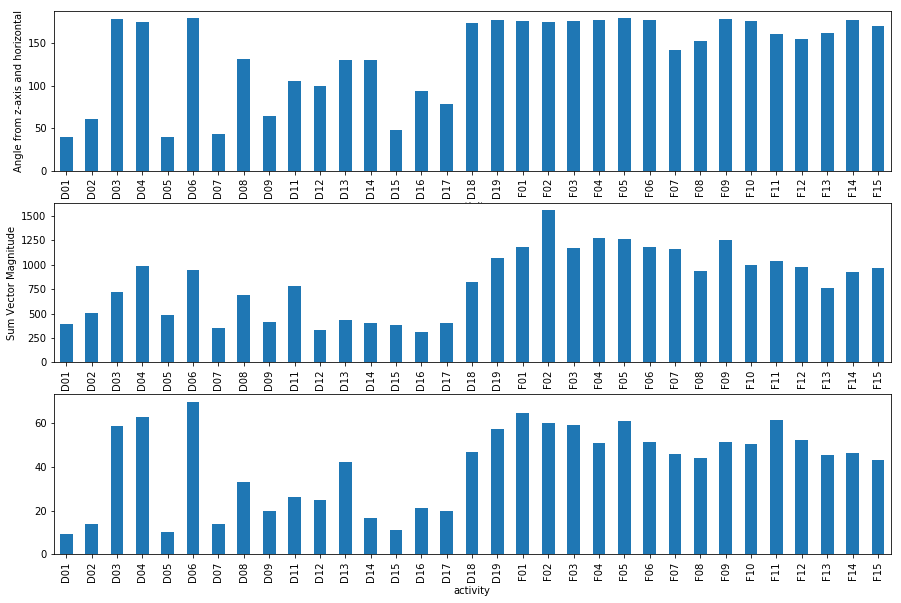

In [234]:
plt.figure(figsize=(15,10))
plt.subplot(3, 1, 1)
x = pivot1.loc[:, ('max', 'angle_from_horiz')]
x.plot(kind='bar')
plt.ylabel('Angle from z-axis and horizontal')

plt.subplot(3, 1, 2)
x = pivot1.loc[:, ('max', 'vector_mag')]
x.plot(kind='bar')
plt.ylabel('Sum Vector Magnitude')

plt.subplot(3, 1, 3)
x = pivot1.loc[:, ('max', 'angle_std')]
x.plot(kind='bar');
plt.ylabel('');


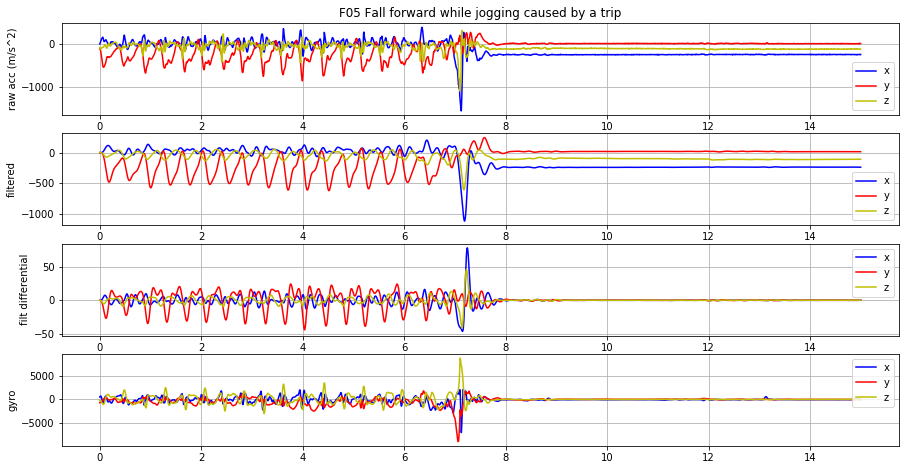

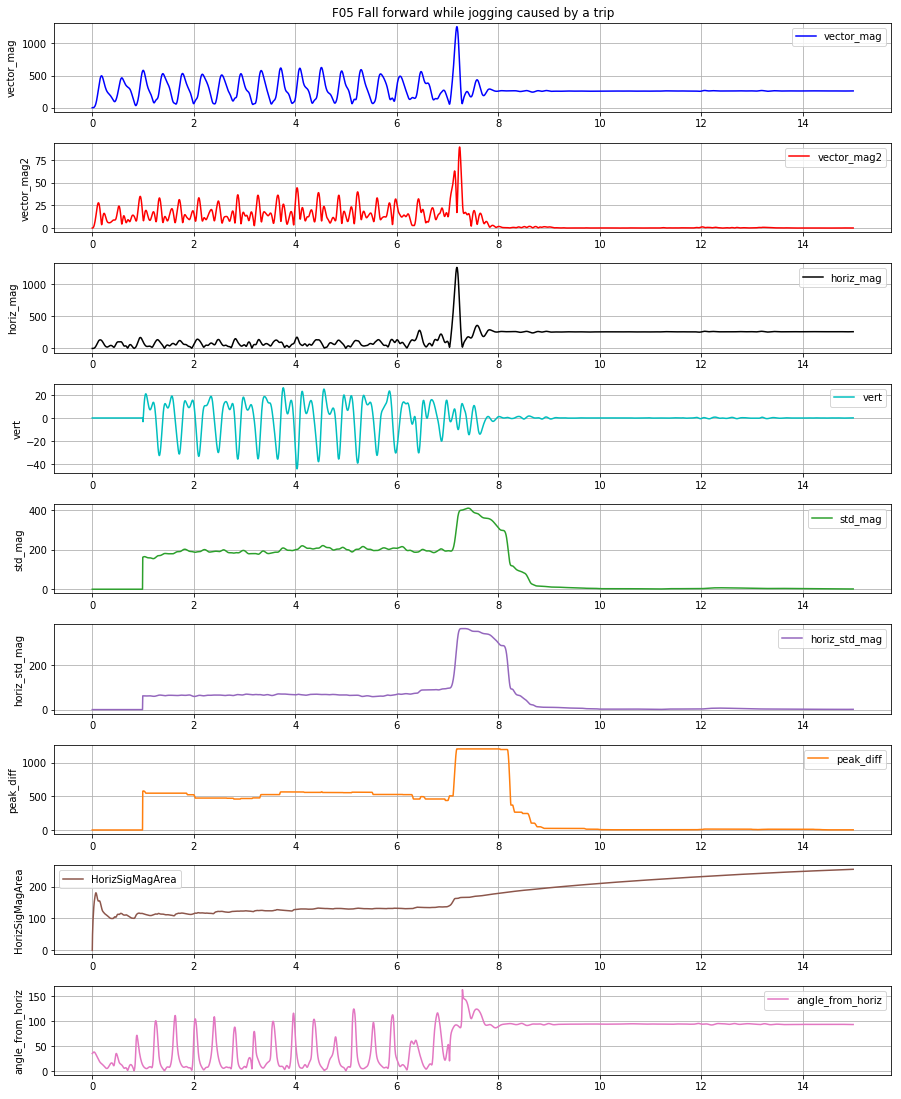

In [180]:
plot_trial(4, 'f')

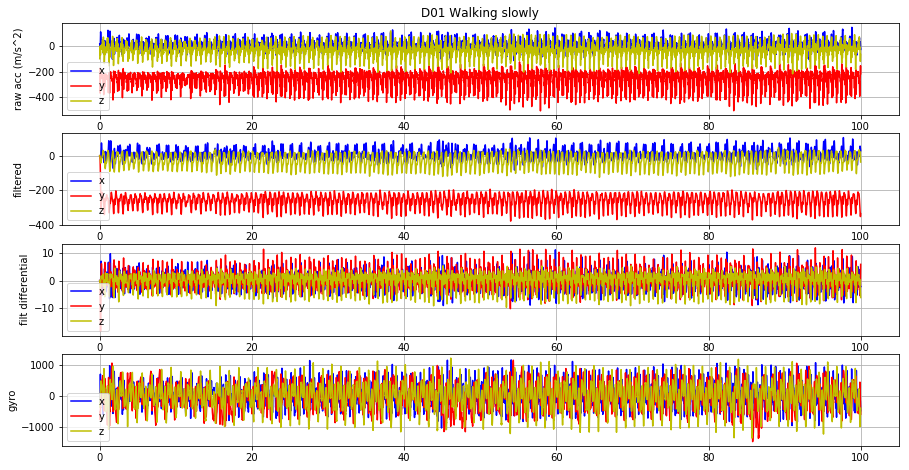

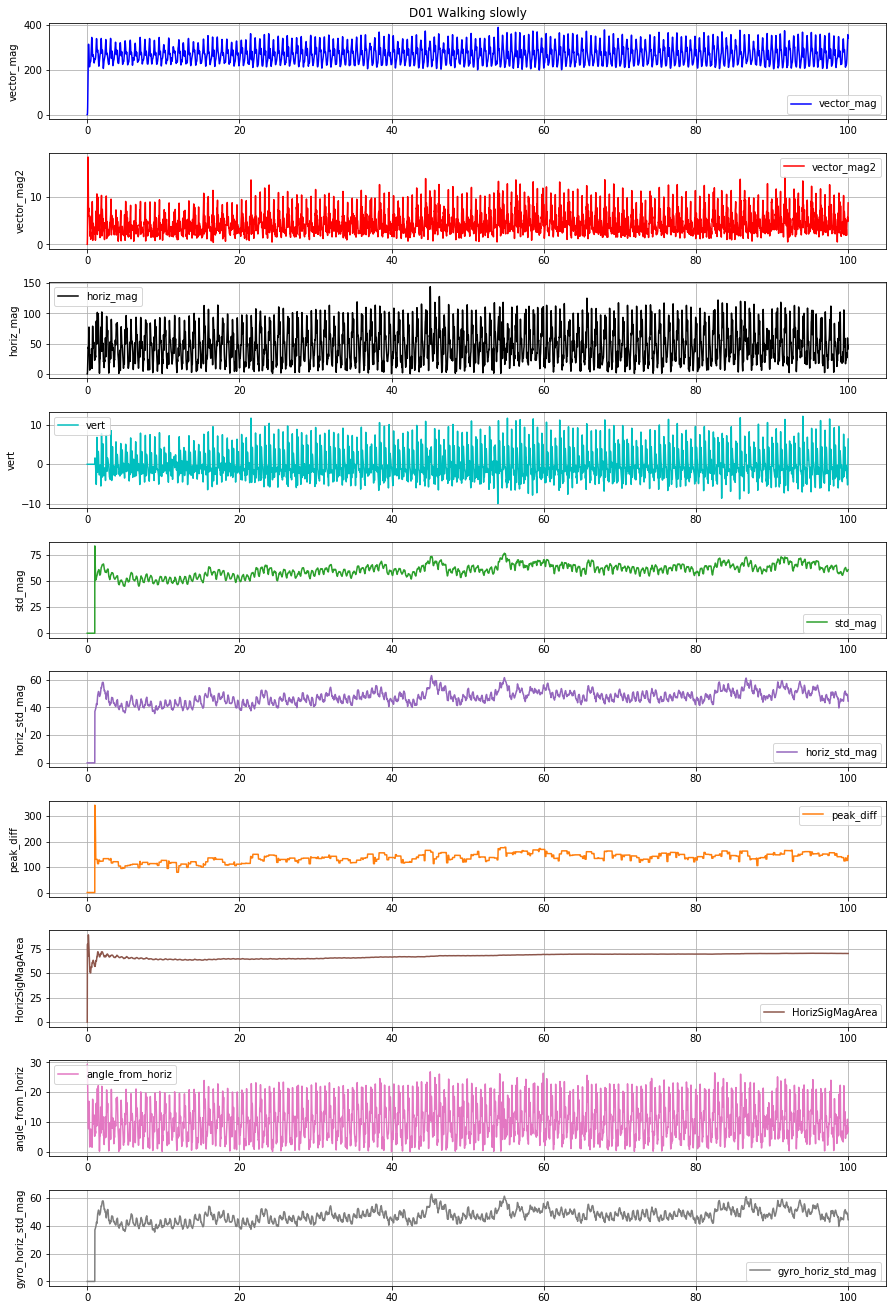

In [10]:
plot_trial(0, 'a')

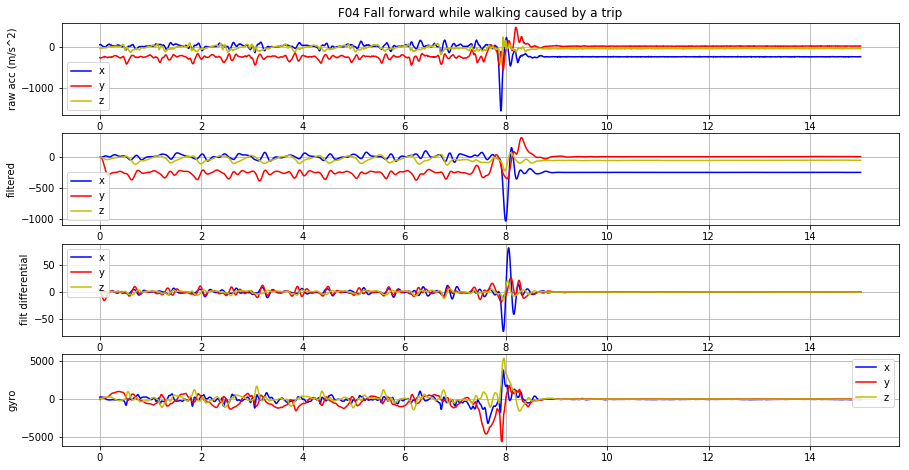

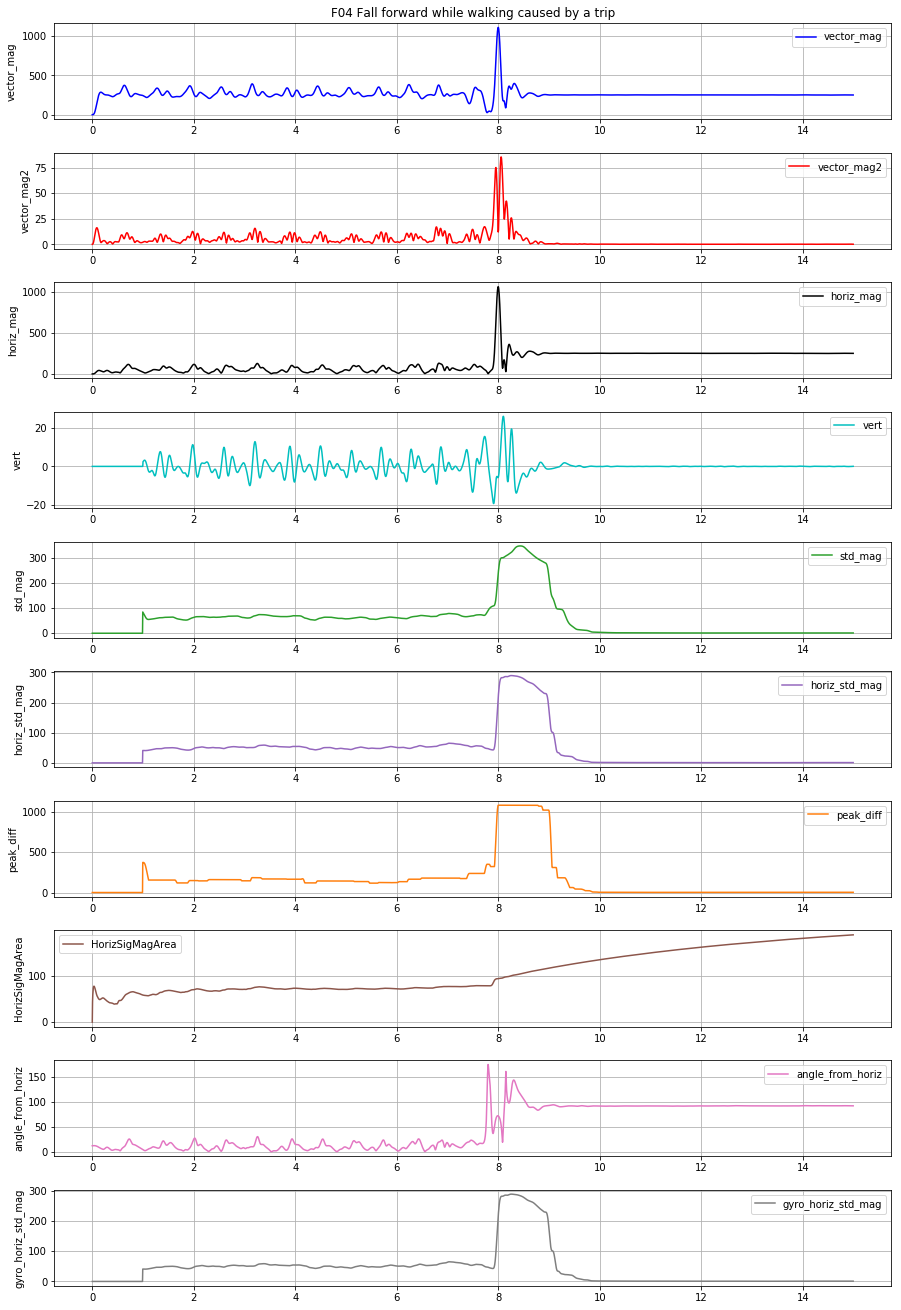

In [11]:
plot_trial(3, 'f')

In [4]:
adl_df_list

NameError: name 'adl_df_list' is not defined